In [30]:
class NaiveBayesClassifier:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.class_priors = np.zeros(len(self.classes))
        self.class_means = {}
        self.class_stddevs = {}

        for c in self.classes:
            X_c = X[y == c]
            # P(y)
            self.class_priors[c] = len(X_c) / len(X)
            self.class_means[c] = np.mean(X_c, axis=0)
            self.class_stddevs[c] = np.std(X_c, axis=0)

        # Calculate class probabilities
        self.class_probabilities = {c: self.class_priors[c] for c in self.classes}

    #P(x|y)
    def _calculate_likelihood(self, x, mean, stddev):
        exponent = np.exp(-((x - mean) ** 2) / (2 * (stddev ** 2)))
        return (1 / (np.sqrt(2 * np.pi) * stddev)) * exponent

    def _calculate_posterior(self, x):
        posteriors = []
        for idx, c in enumerate(self.classes):
            likelihood = np.sum(np.log(self._calculate_likelihood(x, self.class_means[c], self.class_stddevs[c])))
            posterior = np.log(self.class_priors[c]) + likelihood
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors)]

    def predict(self, X):
        predictions = []
        for x in X:
            predictions.append(self._calculate_posterior(x))
        return predictions
    def predict_proba(self, X):
        probabilities = []
        for x in X:
            likelihoods = []
            for c in self.classes:
                likelihood = np.sum(np.log(self._calculate_likelihood(x, self.class_means[c], self.class_stddevs[c])))
                posterior = np.log(self.class_priors[c]) + likelihood
                likelihoods.append(posterior)
            # Softmax function to get probabilities
            exp_likelihoods = np.exp(likelihoods - np.max(likelihoods))
            probabilities.append(exp_likelihoods / np.sum(exp_likelihoods))
        return probabilities
# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train Naive Bayes classifier
nb_classifier = NaiveBayesClassifier()
nb_classifier.fit(X_train, y_train)

# Make predictions
predictions = nb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Print class probabilities
print("Class Probabilities:")
for c in nb_classifier.class_probabilities:
    print(f"P({iris.target_names[c]}) = {nb_classifier.class_probabilities[c]:.3f}")


Accuracy: 1.0
Class Probabilities:
P(setosa) = 0.333
P(versicolor) = 0.342
P(virginica) = 0.325


In [22]:
predictions = nb_classifier.predict(X_train)

# Calculate accuracy
accuracy = accuracy_score(y_train, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.95


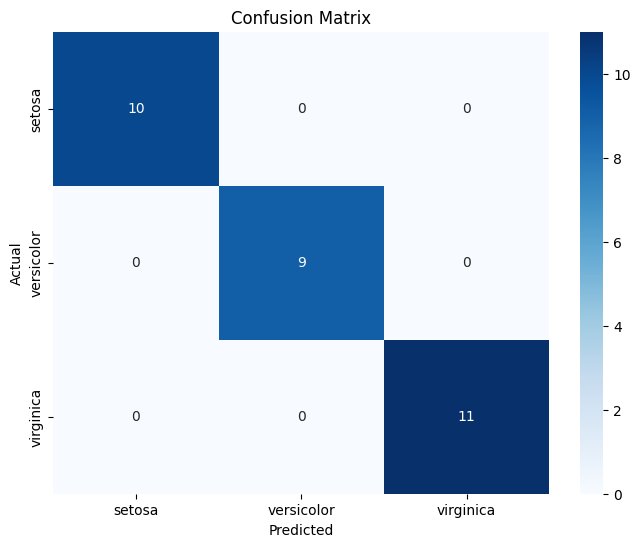

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions
predictions = nb_classifier.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


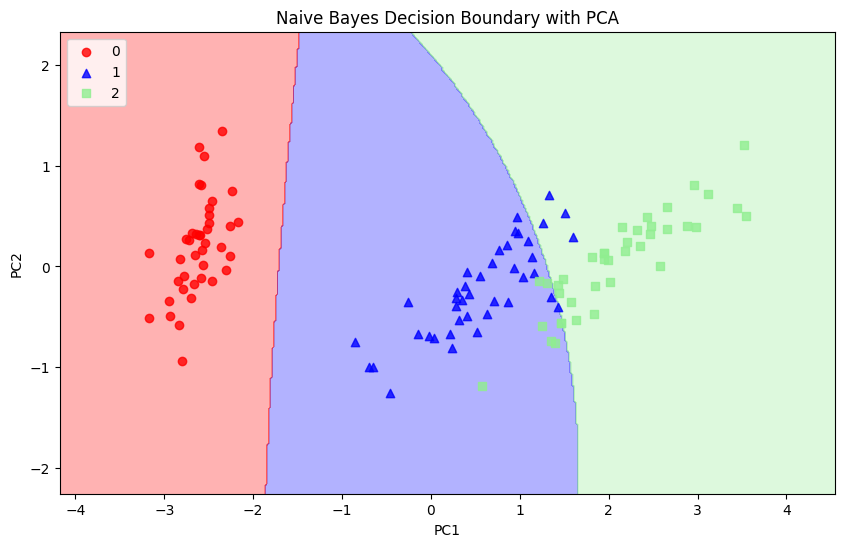

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# Function to plot decision boundaries
def plot_decision_boundary(X, y, classifier):
    markers = ('o', '^', 's')
    colors = ('red', 'blue', 'lightgreen')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))
    Z = np.array(classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T))
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=[cmap(idx)],
                    marker=markers[idx], label=cl)

# Apply PCA to visualize data in 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Create and train Naive Bayes classifier
nb_classifier = NaiveBayesClassifier()
nb_classifier.fit(X_train_pca, y_train)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plot_decision_boundary(X_train_pca, y_train, nb_classifier)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='upper left')
plt.title('Naive Bayes Decision Boundary with PCA')
plt.show()


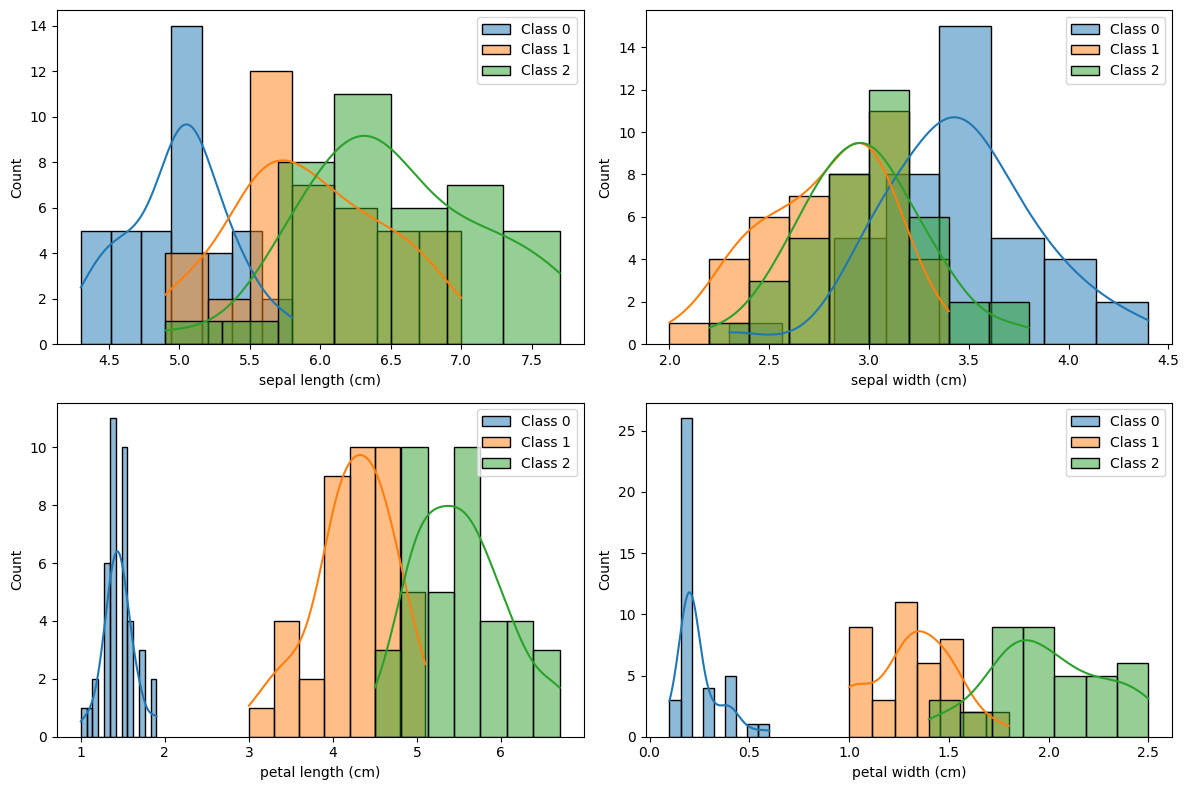

In [23]:
# Plot feature distribution
plt.figure(figsize=(12, 8))
for i in range(X_train.shape[1]):
    plt.subplot(2, 2, i+1)
    for c in np.unique(y_train):
        sns.histplot(X_train[y_train == c, i], kde=True, label=f'Class {c}')
    plt.xlabel(iris.feature_names[i])
    plt.legend()
plt.tight_layout()
plt.show()


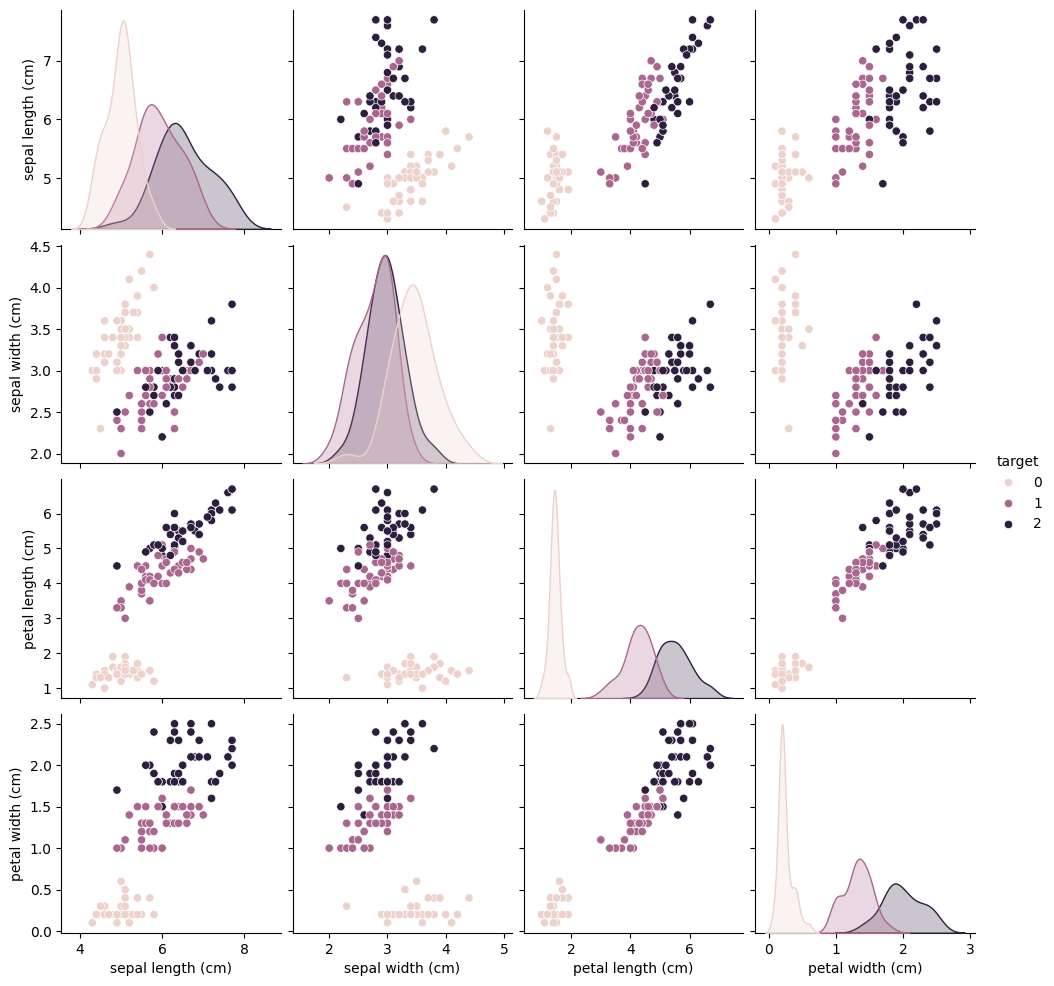

In [25]:
import seaborn as sns
import pandas as pd

# Create DataFrame for pairplot
iris_df = pd.DataFrame(X_train, columns=iris.feature_names)
iris_df['target'] = y_train

# Plot pairplot
sns.pairplot(iris_df, hue='target', diag_kind='kde')
plt.show()


In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)

# Make predictions
predictions = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 1.0
